### 0. Data preparation

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import csv
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
import xgboost as xgb

In [33]:
#bnp = pd.read_csv('./data/BNP_cleaned3.csv')
bnp = pd.read_csv('./data/BNP_hi_removed4.csv')
bnp.head()

,ID,target,v1,v2,v4,v5,v6,v7,v9,v14,...,v129_0,v129_1,v129_11,v129_2,v129_3,v129_4,v129_5,v129_6,v129_7,v129_8
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,9.999999,11.636387,...,1,0,0,0,0,0,0,0,0,0
1,4,1,1.630686,7.464411,4.145098,9.191265,2.436402,2.483921,9.031859,11.636386,...,1,0,0,0,0,0,0,0,0,0
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,12.666667,9.603542,...,0,0,0,1,0,0,0,0,0,0
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,8.965516,14.094723,...,0,1,0,0,0,0,0,0,0,0
4,8,1,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,9.031859,10.991098,...,1,0,0,0,0,0,0,0,0,0


In [34]:
ids = bnp.iloc[:,0]
bnp.target = bnp.iloc[:, 1]
bnp.data = bnp.iloc[:, 2:]

In [35]:
ids.head()

0    3
1    4
2    5
3    6
4    8
Name: ID, dtype: int64

In [36]:
bnp.data.head()

,v1,v2,v4,v5,v6,v7,v9,v14,v16,v18,...,v129_0,v129_1,v129_11,v129_2,v129_3,v129_4,v129_5,v129_6,v129_7,v129_8
0,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,9.999999,11.636387,8.571429,0.106720,...,1,0,0,0,0,0,0,0,0,0
1,1.630686,7.464411,4.145098,9.191265,2.436402,2.483921,9.031859,11.636386,4.923222,0.841045,...,1,0,0,0,0,0,0,0,0,0
2,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,12.666667,9.603542,5.882353,0.244541,...,0,0,0,1,0,0,0,0,0,0
3,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,8.965516,14.094723,5.517242,1.224114,...,0,1,0,0,0,0,0,0,0,0
4,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,9.031859,10.991098,4.923222,0.841045,...,1,0,0,0,0,0,0,0,0,0


In [37]:
bnp.target.head()
#bnp['ID'][1:5]
#bnp['target'][1:5]

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [39]:
print bnp.data.iloc[0:10,17:24] 
#print bnp.data.iloc[0:5,45:52]
#print bnp.data.iloc[0:5,101:108]

        v37       v39        v40        v42        v44        v45        v48
0  0.454546  4.012088   7.711453  12.707581  10.498338   9.848672  12.171733
1  0.741471  1.237184  14.305766  12.924965  10.795169   9.142231  12.538022
2  0.259740  7.378964  13.077201  12.346939   8.897561   5.343819  12.711328
3  0.433735  0.287322  11.523045  12.935823  12.708574   9.670823  12.194855
4  0.741471  1.237184  10.138920  12.924965  10.795169   9.142231  12.538022
5  0.741471  1.237184   7.903915  12.924965  10.795169   9.142231  12.538022
6  0.549451  0.031587  14.787641  14.445526  11.765638   9.406689  13.256878
7  0.741471  1.237184   3.034513  12.924965  10.795169   9.142231  12.538022
8  0.975611  3.169000  12.199552  11.741573  10.173000   7.936837  12.940907
9  0.793651  0.075258  10.803126  13.267328  10.295850  12.480398  13.982603


In [10]:
bnp.data = bnp.data.drop('v22', 1)
#bnp.data = bnp.data.drop('v56', 1)
#bnp.data = bnp.data.drop('v125', 1)
"""
##print bnp.data.iloc[0:10,17:24]
##print bnp.data.iloc[0:5,45:52]
##print bnp.data.iloc[0:5,101:108]
"""
print bnp.data.iloc[0:10,17:24]

        v19        v20       v21           v23       v25       v26       v27
0  0.148883  18.869283  7.730923 -1.716131e-08  0.139412  1.720818  3.393503
1  0.222300  17.773592  6.763110  1.093088e+00  3.056144  1.876031  2.743454
2  0.144258  17.952332  5.245035 -2.785053e-07  0.113997  2.244897  5.306122
3  0.231630  18.376407  7.517125 -4.805344e-07  0.148843  1.308269  2.303640
4  0.222300  17.773592  6.414567  1.093088e+00  1.698129  1.876031  2.743454
5  0.222300  17.773592  7.351426  1.093088e+00  0.218458  1.876031  2.743454
6  0.443661  17.226675  6.661479  7.813019e-07  0.180765  1.070040  1.566147
7  0.222300  17.773592  7.806704  1.093088e+00  1.698129  1.876031  2.743454
8  0.180616  17.754603  6.034953 -3.643173e-07  0.058906  1.647940  3.089888
9  0.271822  18.410067  8.312447  3.955979e-08  0.509588  1.168523  1.410891


In [123]:
bnp.data.shape

(114321, 470)

### 0.1.Split

In [40]:
# 1. Split the data set into two parts: training set and test set(with random_state=0, 
#    and test_size=1.0/2).
import numpy as np
import sklearn.cross_validation as cv

# Generate a random split into training & test sets
x_train, x_test, y_train, y_test = \
        cv.train_test_split(bnp.data, bnp.target, test_size=0.2, random_state=0)

# Testing    
print "Original: " + str(bnp.data.shape) + str(bnp.target.shape)
print "Training: " + str(x_train.shape) + str(y_train.shape)
print "Test:     " + str(x_test.shape)  + str(y_test.shape)

Original: (114321, 470)(114321,)
Training: (91456, 470)(91456,)
Test:     (22865, 470)(22865,)


## 4. ML Methods 

### 4.1. Random Forest

In [139]:
# (1) Fit a random forest on the training set. Report the training error and test error.
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(x_train, y_train) # fit 
print "- The training error is: %.5f" %(1-rf.score(x_train, y_train))
print "- The test     error is: %.5f" %(1-rf.score(x_test, y_test))

- The training error is: 0.00765
- The test     error is: 0.24645


In [141]:
# (2) Use the function grid_search.GridSearchCV to find the best parameters. 
#     a. What's the best parameters? 
#     b. What's the best score? 
#     c. What's the training error and test error of the best model. 
#     The possible combination of the parameters may be: 
#     grid_para_forest = {'criterion': ['gini', 'entropy'], '
#                          max_depth': range(1, 31), "n_estimators": range(10, 110, 10)}
import sklearn.grid_search as gs

grid_para_forest = [{'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31), \
                     "n_estimators": range(10, 110, 10)}]
grid_search_forest = gs.GridSearchCV(rf, grid_para_forest, scoring='accuracy', cv=5)
grid_search_forest.fit(x_train, y_train)

print "best parameters: ", grid_search_forest.best_params_
print "best scores: ", grid_search_forest.best_score_
print "best model training error: ", (1-grid_search_forest.score(x_train, y_train))
print "best model test error:  ", (1-grid_search_forest.score(x_test, y_test))  

# Newly added from below
print "\n\n"
rf_feature_importance = zip(x_train, rf.feature_importances_)

dtype = [('feature', 'S20'), ('importance', 'float')] # S10: 10-character string
rf_feature_importance = np.array(rf_feature_importance, dtype = dtype)
rf_feature_sort = np.sort(rf_feature_importance, order='importance')[::-1]

print "Most important features are: \n", rf_feature_sort
print "Least important features are: \n", np.sort(rf_feature_importance, order='importance')[-50:] 


KeyboardInterrupt: 

In [ ]:
# (3) What's the first 5 important features?
rf_feature_importance = zip(x_train, rf.feature_importances_)

dtype = [('feature', 'S20'), ('importance', 'float')] # S10: 10-character string
rf_feature_importance = np.array(rf_feature_importance, dtype = dtype)
rf_feature_sort = np.sort(rf_feature_importance, order='importance')[::-1]

print "Most important features are: \n", rf_feature_sort
print "Least important features are: \n", np.sort(rf_feature_importance, order='importance')[-50:] 
#print "Top 5 important features are: \n", rf_feature_sort[0:5]


In [ ]:
# Top 'least' important features...
np.sort(rf_feature_importance, order='importance')[-50:] 

### 4.2. XGBoost


#### 4.2.1. Definition
* <b>XGBoost (eXtreme Gradient Boosting)</b> is an advanced implementation of gradient boosting algorithm

#### 4.2.2. Advantages
* <b>Regularization</b>
* <b>Parallel Processing</b>
* <b>High Flexibility</b>
* <b>Handling Missing Values</b>
* <b>Tree Pruning</b>
* <b>Built-in Cross-Validation</b>
* <b>Continue on Existing Model</b>


#### 4.2.3. XGBoost Complete guide to tune the parameters 
* http://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [148]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

#train = pd.read_csv('train_modified.csv')
train = pd.read_csv('./data/BNP_hi_removed4.csv')
target = 'target'
IDcol = 'ID'
train.head()

,ID,target,v1,v2,v4,v5,v6,v7,v9,v14,...,v129_0,v129_1,v129_11,v129_2,v129_3,v129_4,v129_5,v129_6,v129_7,v129_8
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,9.999999,11.636387,...,1,0,0,0,0,0,0,0,0,0
1,4,1,1.630686,7.464411,4.145098,9.191265,2.436402,2.483921,9.031859,11.636386,...,1,0,0,0,0,0,0,0,0,0
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,12.666667,9.603542,...,0,0,0,1,0,0,0,0,0,0
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,8.965516,14.094723,...,0,1,0,0,0,0,0,0,0,0
4,8,1,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,9.031859,10.991098,...,1,0,0,0,0,0,0,0,0,0


* <b>XGBoost modelfit function</b>

In [150]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds, \
                          metrics=['logloss'], early_stopping_rounds=early_stopping_rounds, show_progress=False)
                          #metrics=['auc'], early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg_fit = alg.fit(dtrain[predictors], dtrain['target'],eval_metric='logloss')
    print alg_fit
    
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['target'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['target'], dtrain_predprob)
    print "LOGLOSS Score (Train): %f" % metrics.log_loss(dtrain['target'], dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

<br>
<b>Parameter settings Step 1</b>
* Fix learning rate and number of estimators for tuning tree-based parameters

Will train until cv error hasn't decreased in 50 rounds.
Stopping. Best iteration: 47


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=48, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

Model Report
Accuracy : 0.8054
AUC Score (Train): 0.843149
LOGLOSS Score (Train): 0.421273


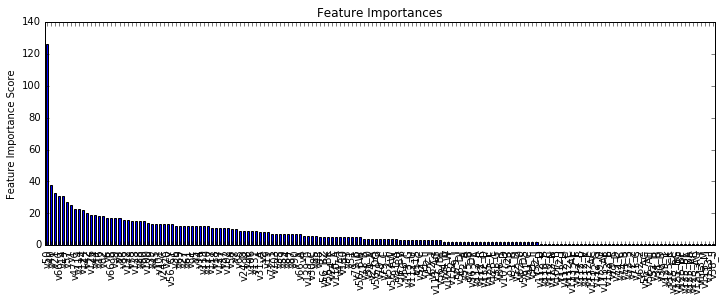

In [152]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27
)

modelfit(xgb1, train[:10000], predictors)

<b> Parameter settings Step 2</b>
* Tune max_depth and min_child_weight

In [154]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=47, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='log_loss',n_jobs=4,iid=False, cv=5)
 #param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5) 

#gsearch1.fit(train[predictors],train[target]) # origin
gsearch1.fit(train[:10000][predictors],train[:10000][target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.48577, std: 0.00777, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: -0.48552, std: 0.00801, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: -0.48573, std: 0.00791, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: -0.48665, std: 0.00822, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: -0.48648, std: 0.00914, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: -0.48517, std: 0.00836, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: -0.49115, std: 0.00978, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: -0.48942, std: 0.00960, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: -0.48726, std: 0.00891, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: -0.49433, std: 0.01051, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: -0.49368, std: 0.00907, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: -0.49087, std: 0.00874, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_chil

In [158]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=47, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='log_loss',n_jobs=4,iid=False, cv=5)
 #param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5) 

#gsearch2.fit(train[predictors],train[target])
gsearch2.fit(train[:10000][predictors],train[:10000][target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: -0.48488, std: 0.00870, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: -0.48533, std: 0.00756, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: -0.48471, std: 0.00772, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: -0.48547, std: 0.00779, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: -0.48517, std: 0.00836, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: -0.48494, std: 0.00719, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: -0.48691, std: 0.00826, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: -0.48670, std: 0.00733, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: -0.48607, std: 0.00764, params: {'max_depth': 6, 'min_child_weight': 6}],
 {'max_depth': 4, 'min_child_weight': 6},
 -0.48471168253236135)

In [159]:
param_test2b = {
 'max_depth':[2,3,4],
 'min_child_weight':[6,7,8]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=47, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='log_loss',n_jobs=4,iid=False, cv=5)

gsearch2b.fit(train[:10000][predictors],train[:10000][target])
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

([mean: -0.48828, std: 0.00779, params: {'max_depth': 2, 'min_child_weight': 6},
  mean: -0.48832, std: 0.00765, params: {'max_depth': 2, 'min_child_weight': 7},
  mean: -0.48825, std: 0.00751, params: {'max_depth': 2, 'min_child_weight': 8},
  mean: -0.48580, std: 0.00774, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: -0.48542, std: 0.00804, params: {'max_depth': 3, 'min_child_weight': 7},
  mean: -0.48540, std: 0.00832, params: {'max_depth': 3, 'min_child_weight': 8},
  mean: -0.48471, std: 0.00772, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: -0.48475, std: 0.00775, params: {'max_depth': 4, 'min_child_weight': 7},
  mean: -0.48433, std: 0.00781, params: {'max_depth': 4, 'min_child_weight': 8}],
 {'max_depth': 4, 'min_child_weight': 8},
 -0.48433362864381102)

In [160]:
param_test2c = {
 'min_child_weight':[8,9,10,11]
}
gsearch2c = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=47, max_depth=4,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2c, scoring='log_loss',n_jobs=4,iid=False, cv=5)

gsearch2c.fit(train[:10000][predictors],train[:10000][target])
gsearch2c.grid_scores_, gsearch2c.best_params_, gsearch2c.best_score_

([mean: -0.48433, std: 0.00781, params: {'min_child_weight': 8},
  mean: -0.48456, std: 0.00838, params: {'min_child_weight': 9},
  mean: -0.48468, std: 0.00768, params: {'min_child_weight': 10},
  mean: -0.48406, std: 0.00794, params: {'min_child_weight': 11}],
 {'min_child_weight': 11},
 -0.48406042914413677)

<br>
<b> Parameter settings Step 3</b>
* Tune Gamma

In [161]:
# Gamma tunning
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=47, max_depth=4,
 min_child_weight=11, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='log_loss',n_jobs=4,iid=False, cv=5)
 #param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5) 

#gsearch3.fit(train[predictors],train[target])
gsearch3.fit(train[:10000][predictors],train[:10000][target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: -0.48406, std: 0.00794, params: {'gamma': 0.0},
  mean: -0.48442, std: 0.00734, params: {'gamma': 0.1},
  mean: -0.48442, std: 0.00734, params: {'gamma': 0.2},
  mean: -0.48416, std: 0.00732, params: {'gamma': 0.3},
  mean: -0.48439, std: 0.00768, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 -0.48406042914413677)

Will train until cv error hasn't decreased in 50 rounds.
Stopping. Best iteration: 53


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=11, missing=None, n_estimators=54, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

Model Report
Accuracy : 0.79
AUC Score (Train): 0.794669
LOGLOSS Score (Train): 0.450588


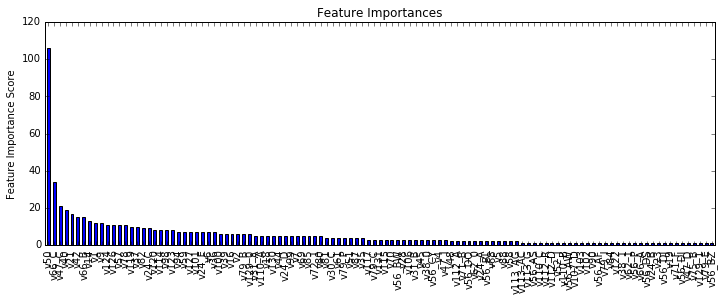

In [162]:
# re-calibrate the number of boosting rounds for the updated parameters.
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=140,
 max_depth=4,
 min_child_weight=11,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb2, train[:10000], predictors)

<br>
<b> Parameter settings Step 4</b>
* Tune subsample and colsample_bytree

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=47, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=47, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])

<br>
<b>Parameter settings Step 5</b>
* Tuning Regularization Parameters

In [ ]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=47, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

In [ ]:
aram_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=47, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train[predictors],train[target])
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

In [ ]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=47,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, train, predictors)

<br>
<b>Parameter settings Step 6</b> 
* Reducing Learning Rate

In [ ]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, train, predictors)

### 4.3. Decision Tree

In [163]:
# (1) Fit a decision tree model on the training set with the default setting.
from sklearn import tree
import sklearn.grid_search as gs
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

## Test
print "- The training error is: %.5f" %(1-tree_model.score(x_train, y_train))
print "- The test     error is: %.5f" %(1-tree_model.score(x_test, y_test))
print "- Feature importances are: \n", tree_model.feature_importances_

- The training error is: 0.00000
- The test     error is: 0.29950
- Feature importances are: 
[  5.26758523e-03   6.44926392e-03   6.12024145e-03   4.57549583e-03
   8.24158399e-03   7.73041403e-03   7.16138460e-03   3.10072513e-02
   6.69773354e-03   7.25383438e-03   7.19771644e-03   3.81847353e-02
   4.63912121e-03   6.96850441e-03   8.04178944e-03   6.86993071e-03
   8.77777963e-03   5.08370392e-03   8.96294319e-03   3.19872213e-02
   6.43606784e-03   8.35193337e-03   7.50954889e-03   3.57494502e-03
   1.36791668e-01   5.69649447e-03   5.61436905e-03   6.47228886e-03
   5.43614315e-03   5.76340579e-03   8.64946709e-03   6.61616127e-03
   8.60968189e-03   7.07991152e-03   8.75246127e-03   5.04056774e-03
   8.23902386e-03   6.18374064e-03   6.74286251e-03   5.89958155e-03
   6.11926079e-03   7.31731976e-03   4.30142188e-03   6.08133250e-03
   7.56497407e-03   7.93491578e-03   5.52013123e-03   5.68703902e-03
   7.23300361e-03   6.41488247e-03   4.13604730e-03   3.15856720e-02
   5.9400

In [ ]:
# (2) Set the depth of the tree from 1 to 30. Look the varies of the training error and test error.
depth = range(1,30)
train_error = []
test_error = []
for i in depth:
    tree_model.set_params(max_depth = i, min_samples_leaf=1)
    tree_model.fit(x_train, y_train)
    train_error.append(1 - tree_model.score(x_train, y_train))
    test_error.append(1 - tree_model.score(x_test, y_test))
print "done"

In [ ]:
# Plot
%pylab inline
import matplotlib.pyplot as pl
pl.plot(depth, train_error, c = 'red', label = 'training error')
pl.plot(depth, test_error, c = 'blue', label = 'test error')
pl.ylim(0, 0.35)
pl.legend()
pl.show()

In [ ]:
# (3) Use the function grid_search.GridSearchCV to find the best parameters. 
#     a.What's the best parameters? 
#     b.What's the best score? 
#     c.What's the training error and test error of the best model. 
#     The possible combination of the parameters may be: 
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 11)}
#grid_search_tree = gs.GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy')
grid_search_tree = gs.GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='logloss')
grid_search_tree.fit(x_train, y_train)
print "best parameters: ", grid_search_tree.best_params_
print "best scores: ", grid_search_tree.best_score_
print "best model training error: ", (1-grid_search_tree.score(x_train, y_train)) # overall accuracy on the training set:
print "best model test error:  ", (1-grid_search_tree.score(x_test, y_test))   # overall accuracy on the training set:

In [17]:
# (4) What are the first 5 important features?
# print tree_model.feature_importances_
tm_feature_importance = zip(x_train, tree_model.feature_importances_)
#print tm_feature_importance  # My testing

dtype = [('feature', 'S10'), ('importance', 'float')] # S10: 10-character string
tm_feature_importance = np.array(tm_feature_importance, dtype = dtype)
tm_feature_sort = np.sort(tm_feature_importance, order='importance')[::-1]

print "Top important features are: \n", tm_feature_sort

Top important features are: 
[('v50', 0.14057278011124794) ('v21', 0.0276056988711409)
 ('v66_C', 0.02596362563216391) ('v14', 0.022230693081453118)
 ('v12', 0.021499394892526922) ('v34', 0.02065936258279592)
 ('v40', 0.018446462293741736) ('v114', 0.017249637890962698)
 ('v110_A', 0.014218364452579329) ('v10', 0.01411988948921134)
 ('v66_B', 0.012613352070140872) ('v120', 0.007946379125903378)
 ('v110_B', 0.007868753523342795) ('v99', 0.007735050326966314)
 ('v39', 0.007678787548993244) ('v82', 0.007402035435686816)
 ('v85', 0.007156321053584827) ('v102', 0.007035327548171138)
 ('v70', 0.006978212538767433) ('v35', 0.006752662680096564)
 ('v124', 0.006705004538550452) ('v28', 0.006666906058355843)
 ('v6', 0.006615352558166093) ('v1', 0.00655655669345863)
 ('v88', 0.006551532907318146) ('v44', 0.006507646699740642)
 ('v57', 0.006481451893190328) ('v16', 0.0064225172458518675)
 ('v36', 0.0062418457208903155) ('v122', 0.006222718382557189)
 ('v117', 0.005923910532968088) ('v100', 0.00591

In [25]:
print "\nLeast important features are: \n", tm_feature_sort[0:-100]


Least important features are: 
[('v50', 0.14057278011124794) ('v21', 0.0276056988711409)
 ('v66_C', 0.02596362563216391) ('v14', 0.022230693081453118)
 ('v12', 0.021499394892526922) ('v34', 0.02065936258279592)
 ('v40', 0.018446462293741736) ('v114', 0.017249637890962698)
 ('v110_A', 0.014218364452579329) ('v10', 0.01411988948921134)
 ('v66_B', 0.012613352070140872) ('v120', 0.007946379125903378)
 ('v110_B', 0.007868753523342795) ('v99', 0.007735050326966314)
 ('v39', 0.007678787548993244) ('v82', 0.007402035435686816)
 ('v85', 0.007156321053584827) ('v102', 0.007035327548171138)
 ('v70', 0.006978212538767433) ('v35', 0.006752662680096564)
 ('v124', 0.006705004538550452) ('v28', 0.006666906058355843)
 ('v6', 0.006615352558166093) ('v1', 0.00655655669345863)
 ('v88', 0.006551532907318146) ('v44', 0.006507646699740642)
 ('v57', 0.006481451893190328) ('v16', 0.0064225172458518675)
 ('v36', 0.0062418457208903155) ('v122', 0.006222718382557189)
 ('v117', 0.005923910532968088) ('v100', 0.00

In [ ]:
np.sort(tm_feature_importance, order='importance')

#### Another gridSearchCV testing

In [26]:
# (3) Use the function grid_search.GridSearchCV to find the best parameters. 
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 21)}  # 1~20 maxdepth
grid_search_tree = gs.GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='log_loss')
grid_search_tree.fit(x_train, y_train)
print "best parameters: ", grid_search_tree.best_params_
print "best scores: ", grid_search_tree.best_score_
print "best model training error: ", (1-grid_search_tree.score(x_train, y_train)) # overall accuracy on the training set:
print "best model test error:  ", (1-grid_search_tree.score(x_test, y_test))   # overall accuracy on the training set:

best parameters:  {'criterion': 'gini', 'max_depth': 5}
best scores:  -0.483666379533
best model training error:  1.47896332531
best model test error:   1.48058256035


In [27]:
# (4) Top important features?
# print tree_model.feature_importances_
tm_feature_importance = zip(x_train, tree_model.feature_importances_)

dtype = [('feature', 'S10'), ('importance', 'float')] # S10: 10-character string
tm_feature_importance = np.array(tm_feature_importance, dtype = dtype)
tm_feature_sort = np.sort(tm_feature_importance, order='importance')[::-1]

print "Top important features are: \n", tm_feature_sort

Top important features are: 
[('v50', 0.14057278011124794) ('v21', 0.0276056988711409)
 ('v66_C', 0.02596362563216391) ('v14', 0.022230693081453118)
 ('v12', 0.021499394892526922) ('v34', 0.02065936258279592)
 ('v40', 0.018446462293741736) ('v114', 0.017249637890962698)
 ('v110_A', 0.014218364452579329) ('v10', 0.01411988948921134)
 ('v66_B', 0.012613352070140872) ('v120', 0.007946379125903378)
 ('v110_B', 0.007868753523342795) ('v99', 0.007735050326966314)
 ('v39', 0.007678787548993244) ('v82', 0.007402035435686816)
 ('v85', 0.007156321053584827) ('v102', 0.007035327548171138)
 ('v70', 0.006978212538767433) ('v35', 0.006752662680096564)
 ('v124', 0.006705004538550452) ('v28', 0.006666906058355843)
 ('v6', 0.006615352558166093) ('v1', 0.00655655669345863)
 ('v88', 0.006551532907318146) ('v44', 0.006507646699740642)
 ('v57', 0.006481451893190328) ('v16', 0.0064225172458518675)
 ('v36', 0.0062418457208903155) ('v122', 0.006222718382557189)
 ('v117', 0.005923910532968088) ('v100', 0.00591

In [28]:
print "Least important features oreded"
np.sort(tm_feature_importance, order='importance')

array([('v110_C', 0.0), ('v113_AA', 0.0), ('v113_AK', 0.0),
       ('v125_AJ', 0.0), ('v125_BZ', 0.0), ('v129_11', 0.0),
       ('v129_3', 0.0), ('v129_5', 0.0), ('v129_6', 0.0), ('v129_7', 0.0),
       ('v129_8', 0.0), ('v30_B', 0.0), ('v31_B', 0.0), ('v38_10', 0.0),
       ('v38_12', 0.0), ('v38_2', 0.0), ('v38_4', 0.0), ('v38_6', 0.0),
       ('v38_7', 0.0), ('v38_8', 0.0), ('v38_9', 0.0), ('v3_A', 0.0),
       ('v3_B', 0.0), ('v3_C', 0.0), ('v47_A', 0.0), ('v47_D', 0.0),
       ('v47_H', 0.0), ('v56_A', 0.0), ('v56_AB', 0.0), ('v56_AC', 0.0),
       ('v56_AE', 0.0), ('v56_AJ', 0.0), ('v56_AM', 0.0), ('v56_AP', 0.0),
       ('v56_AT', 0.0), ('v56_AU', 0.0), ('v56_AV', 0.0), ('v56_AX', 0.0),
       ('v56_AY', 0.0), ('v56_B', 0.0), ('v56_BC', 0.0), ('v56_BD', 0.0),
       ('v56_BE', 0.0), ('v56_BF', 0.0), ('v56_BH', 0.0), ('v56_BO', 0.0),
       ('v56_BP', 0.0), ('v56_BQ', 0.0), ('v56_BR', 0.0), ('v56_BS', 0.0),
       ('v56_BT', 0.0), ('v56_BU', 0.0), ('v56_BY', 0.0), ('v56_CB', 0.0)